In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
data = pd.read_csv(r'C:\Users\Shanu\Desktop\Elevate Task\data.csv')#this read data which is located at specific path
print(data.head())
data.info()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [7]:
# Remove unnecessary columns
data_clean = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Map diagnosis: M=1, B=0
data_clean["diagnosis"] = data_clean["diagnosis"].map({"M": 1, "B": 0})

# Check missing values
data_clean.isnull().sum().sum()


0

In [9]:
# Step 1: Separate features (X) and target (y)
X = data_clean.drop(columns=["diagnosis"])  # All columns except the target
y = data_clean["diagnosis"]                 # Only the target column

# Step 2: Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,         # 20% data for testing
    random_state=42,       
    stratify=y            
)

# Step 3: Standardize features (important for many ML models)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                     # Create scaler object
X_train_scaled = scaler.fit_transform(X_train) # Fit to train & transform
X_test_scaled = scaler.transform(X_test)       # Transform test using train's fit

# Check shapes to confirm
print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)


Training data shape: (455, 30)
Testing data shape: (114, 30)


In [11]:
# Step 5: Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(C=1.0, solver='liblinear', random_state=42)

# 2. Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)

# 3. Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# 4. Check model accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9737


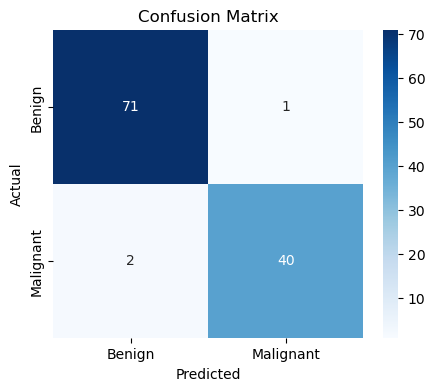

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.9960


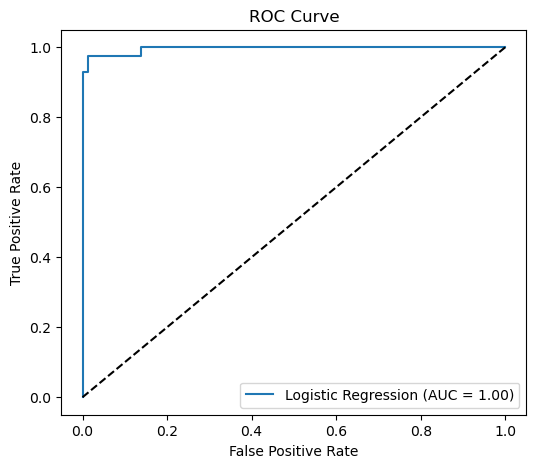

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 2. Precision, Recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# 3. ROC-AUC Score
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 4. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Threshold: 0.3
Confusion Matrix:
 [[71  1]
 [ 1 41]]
Precision: 0.9762
Recall: 0.9762


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


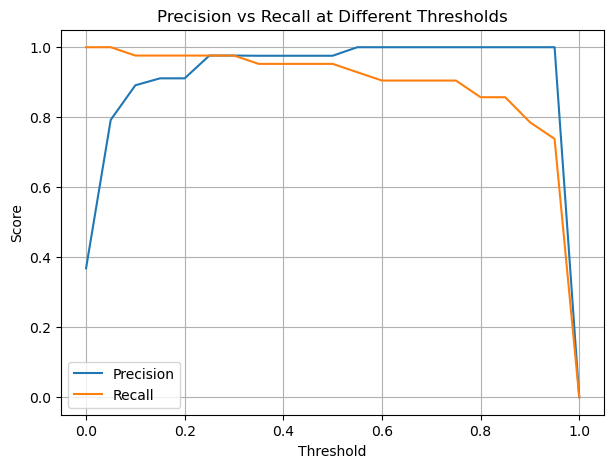

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Get predicted probabilities for class 1
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Function to evaluate metrics for a given threshold
def evaluate_threshold(threshold):
    y_pred_custom = (y_pred_prob >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    return cm, precision, recall

# Example: Threshold = 0.3
cm_03, precision_03, recall_03 = evaluate_threshold(0.3)

print("Threshold: 0.3")
print("Confusion Matrix:\n", cm_03)
print(f"Precision: {precision_03:.4f}")
print(f"Recall: {recall_03:.4f}")

thresholds = np.arange(0.0, 1.01, 0.05)
precisions = []
recalls = []

for t in thresholds:
    _, p, r = evaluate_threshold(t)
    precisions.append(p)
    recalls.append(r)

plt.figure(figsize=(7,5))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall at Different Thresholds")
plt.legend()
plt.grid(True)
plt.show()
